### ERA5-Land monthly averaged data from 1950 to present

This Jupyter notebook will demonstrate how to access and visualise data from the Copernicus Climate Data Store (CDS) dataset **ERA5-Land monthly averaged data from 1950 to present**. It will also show how the dataset's overview image and thumbnail image were generated.

For this demonstration, we will be using the Python package `earthkit` as a one-stop-shop for CDS data access, processing and visulisation. For more information on `earthkit`, including installation instructions, see its [GitHub Repository](https://github.com/ecmwf/earthkit).

In [1]:
import earthkit

#### Retrieving CDS data

Data from the CDS can be accessed through earthkit via the `earthkit.data.from_source()` function. The first argument should be the string `'cds'`, followed by the dataset name (slug), and finally a dictionary containing the contents of your request.

In [14]:
soil_moisture = earthkit.data.from_source(
    'cds',
    'reanalysis-era5-land-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': 'volumetric_soil_water_layer_1',
        'year': '2023',
        'month': '02',
        'time': '00:00',
    },
)

2023-08-02 16:36:02,339 INFO Welcome to the CDS
2023-08-02 16:36:02,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land-monthly-means
2023-08-02 16:36:02,456 INFO Request is queued
2023-08-02 16:36:03,526 INFO Request is running
2023-08-02 16:36:10,864 INFO Request is completed
2023-08-02 16:36:10,865 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data4/adaptor.mars.internal-1690990563.0405777-27168-12-7e71cec7-7258-439a-8f24-eb46b3b47a8d.grib to /var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/earthkit-data-mavj/cds-retriever-436d2bc96fd096bb047cc13320078aa58fe93d0d311e9330fd00b90c681a3e6f.cache.tmp (5M)
2023-08-02 16:36:11,712 INFO Download rate 5.9M/s                                                                                                                   


#### Generating a simple image

This section will demonstrate how the overview image for this dataset was generated.

To start with, we need to define some *styles* for plotting our variables. For 2m temperature, we want a shaded contour style using the *turbo* colour palette from [matplotlib](https://matplotlib.org/stable/gallery/color/colormap_reference.html). Styles can also have *units* associated with them, so that any data plotted using that style will be converted to use the style's units.

In [3]:
soil_moisture_style = earthkit.maps.styles.Contour(
    colors="YlGnBu",
    levels=[0., .02, .05, .1, .15, .2, .25, .3, .35, .4, .5, 1.],
    extend="max",
    units="m3 m-3",
)

Now we can produce our plot, using the styles we just defined. We are using *cartopy* to specify a *Nearside Perspective* projection for our plot.

In [8]:
import cartopy.crs as ccrs

earthkit.maps.schema.figsize = (4, 4)

crs = ccrs.NearsidePerspective(central_latitude=50)
# chart = earthkit.maps.Superplot(crs=crs)

# chart.plot(soil_moisture, style=soil_moisture_style, transform_first=False)

# chart.coastlines(resolution="high")
# chart.stock_img()

# chart.legend(location="bottom")

# # For the title, we can take advantage of earthkit-maps metadata
# # detection, which allows us to use format keys like 'variable_name'
# # and 'time', which are then populated from the metadata of the data
# # that's been plotted.
# chart.title(
#     "ERA5-Land {variable_name}\n"
#     "{time:%-d %B %Y} at {time:%H:%M} UTC",
#     fontsize=11,
# )

# chart.save("overview-detail.png")

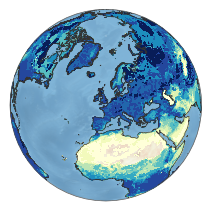

In [10]:
earthkit.maps.schema.figsize = (2, 2)
chart = earthkit.maps.Superplot(crs=crs)

chart.plot(soil_moisture, style=soil_moisture_style, transform_first=False)

chart.coastlines(resolution="medium")
chart.stock_img()

chart.save("overview.png")